In [6]:
import pandas as pd
import matplotlib.pyplot as plt # 基础绘图库（什么都能画，但可能慢、复杂）
import seaborn as sns # 数据可视化专用库（专门用来快速画数据图）


# 中文字体宋体，英文字体新罗马
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.serif'] = ['Times New Roman']
# 字体大小
plt.rcParams['font.size'] = 12  
# 正常显示负号
plt.rcParams['axes.unicode_minus'] = False

In [7]:
df = pd.read_excel('中间数据集\\表1与表2拼接后的数据集.xlsx')
df = df.drop(['文物编号', '采样位置', '纹饰', '表面风化', '颜色', '风化具体情况'], axis=1)
df.head()

,类型,二氧化硅(SiO2),氧化钠(Na2O),氧化钾(K2O),氧化钙(CaO),氧化镁(MgO),氧化铝(Al2O3),氧化铁(Fe2O3),氧化铜(CuO),氧化铅(PbO),氧化钡(BaO),五氧化二磷(P2O5),氧化锶(SrO),氧化锡(SnO2),二氧化硫(SO2)
0,高钾,69.33,0.0,9.99,6.32,0.87,3.93,1.74,3.87,0.00,0.00,1.17,0.00,0.0,0.39
1,铅钡,36.28,0.0,1.05,2.34,1.18,5.73,1.86,0.26,47.43,0.00,3.57,0.19,0.0,0.00
2,高钾,87.05,0.0,5.19,2.01,0.00,4.06,0.00,0.78,0.25,0.00,0.66,0.00,0.0,0.00
3,高钾,61.71,0.0,12.37,5.87,1.11,5.50,2.16,5.09,1.41,2.86,0.70,0.10,0.0,0.00
4,高钾,65.88,0.0,9.67,7.12,1.56,6.44,2.06,2.18,0.00,0.00,0.79,0.00,0.0,0.36


In [8]:
# 假设df是你的数据集DataFrame，category_column是分类列的名称
# 首先，找出所有不同的类别
categories = df["类型"].unique()

# 然后，为每个类别创建一个空的DataFrame
category_datasets = {category: pd.DataFrame() for category in categories}

# 遍历原始数据集，并将每个记录分配到相应的类别DataFrame中
for category in categories:
    category_datasets[category] = df[df["类型"] == category]

df1 = (category_datasets["铅钡"]).drop("类型", axis=1)
df2 = (category_datasets["高钾"]).drop("类型", axis=1)

In [9]:
corr1 = df1.corr(method="spearman")
corr2 = df2.corr(method="spearman")

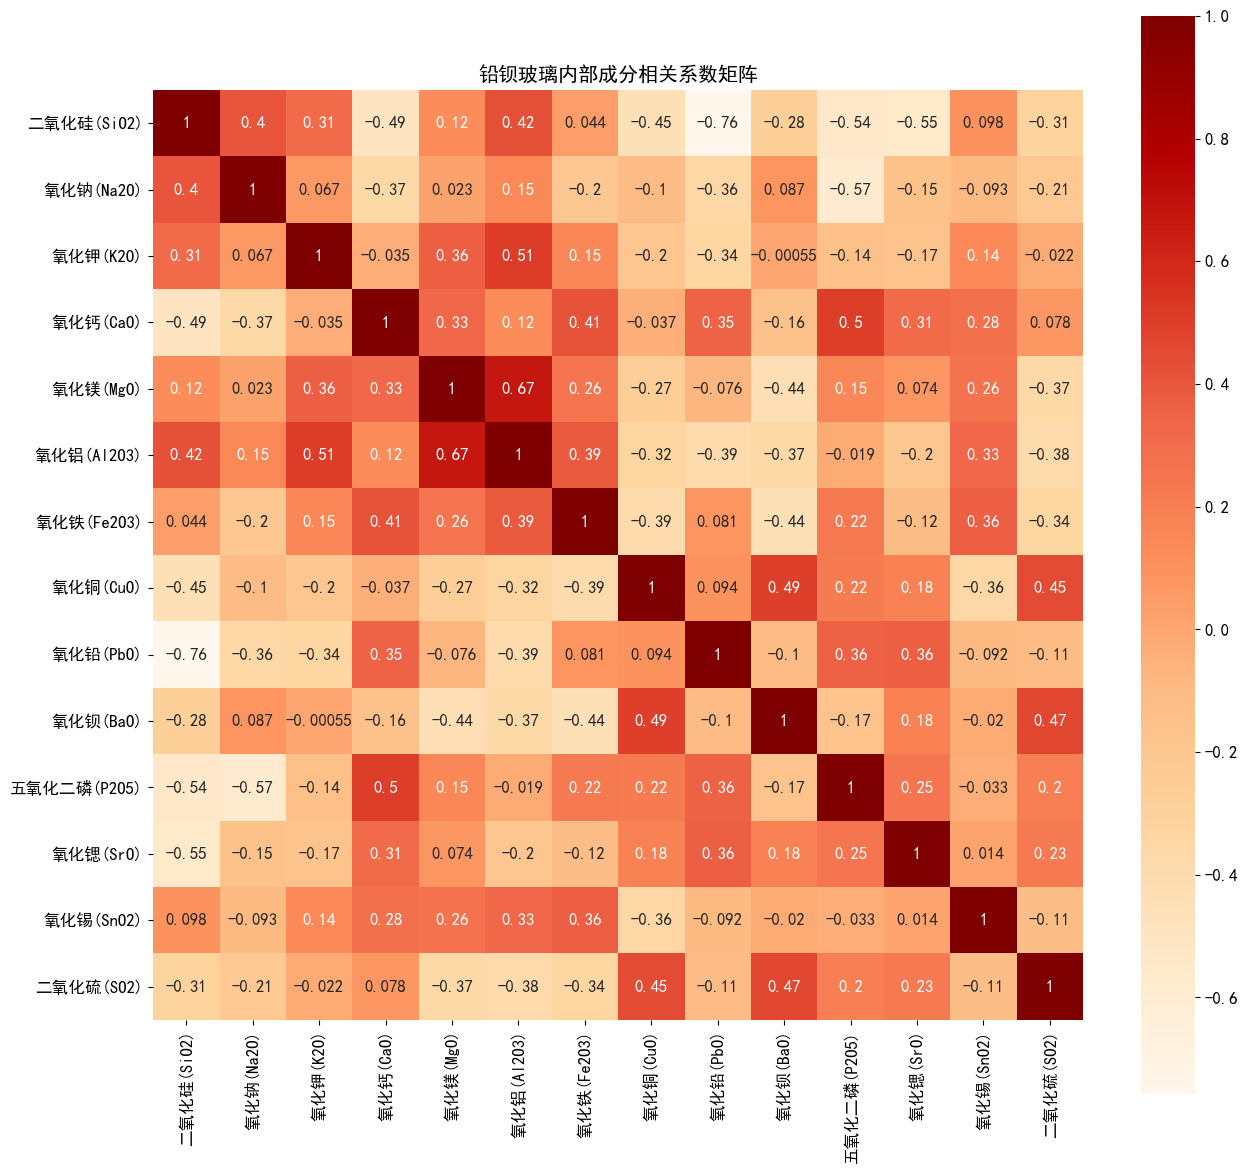

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 14))

sns.heatmap(data=corr1, square=True, cmap="OrRd", annot=True, 
            xticklabels=corr1.columns, yticklabels=corr1.columns, ax=ax)

ax.set_title('铅钡玻璃内部成分相关系数矩阵')
fig.savefig('图片\\11_铅钡玻璃内部成分相关系数矩阵.eps')

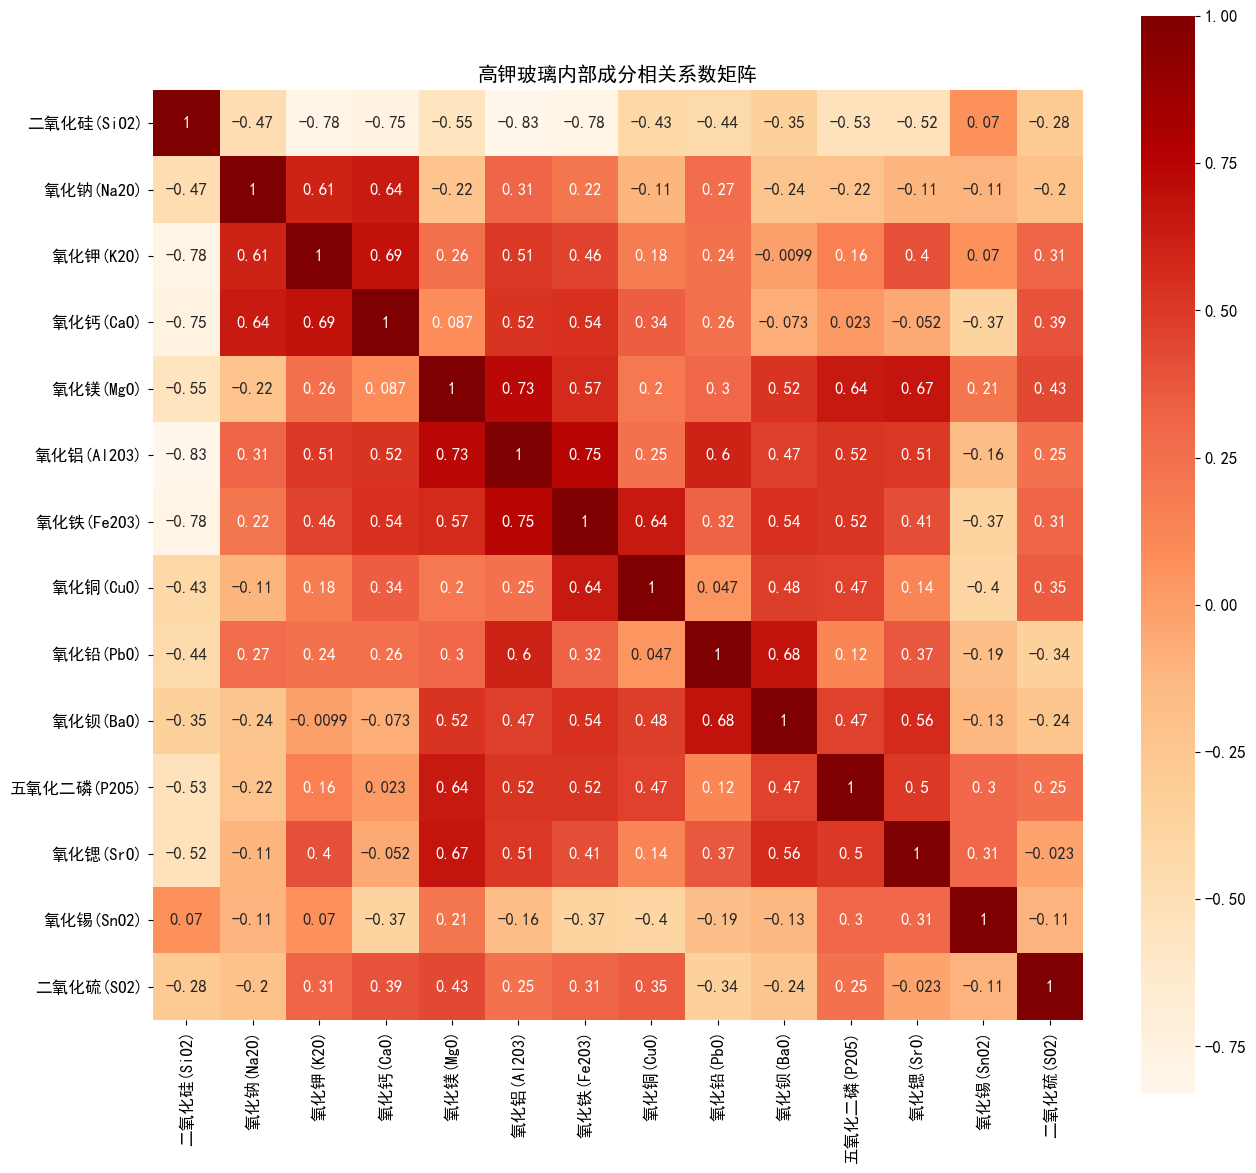

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 14))

sns.heatmap(data=corr2, square=True, cmap="OrRd", annot=True, 
            xticklabels=corr2.columns, yticklabels=corr2.columns, ax=ax)

ax.set_title('高钾玻璃内部成分相关系数矩阵')
fig.savefig('图片\\12_高钾玻璃内部成分相关系数矩阵.eps')